# Preparing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path_vd = 'vgsales.csv'
df_vd = pd.read_csv(path_vd)

C:\Users\supka\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_vd

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df_vd.shape # Structure of data frame(rows, columns)

(16598, 11)

In [4]:
df_vd.info() # Information about data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Categorical columns
cat_col = [col for col in df_vd.columns if df_vd[col].dtype == 'object']
print('Categorical columns:', cat_col)
# Numerical columns
num_col = [col for col in df_vd.columns if df_vd[col].dtype != 'object']
print('Numerical columns:', num_col)

Categorical columns: ['Name', 'Platform', 'Genre', 'Publisher']
Numerical columns: ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [6]:
df_vd[cat_col].nunique() # number of unique categories

Name         11493
Platform        31
Genre           12
Publisher      578
dtype: int64

In [7]:
df = df_vd.drop_duplicates(keep='first') # dropping duplicates and creating copy of dataset
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
df.isnull().sum() # Checking missing values

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.drop('Rank', axis=1, inplace=True) #Removing Rank column

In [10]:
df # Checking if columns were deleted

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [11]:
df['Publisher'].fillna('Unknown', inplace=True)  # filling missing publisher data with unknown, 
                        #imputer will give us wrong data because publishers are unlikely correlated with average sales numbers 

In [12]:
df['Year'].fillna('0', inplace=True)  # filling missing year data with zeros which means unknown

In [13]:
df.isnull().sum() # Checking missing values again

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Data visualisation and stats

<font size="3"><strong>Exploratory data analysis</strong></font>

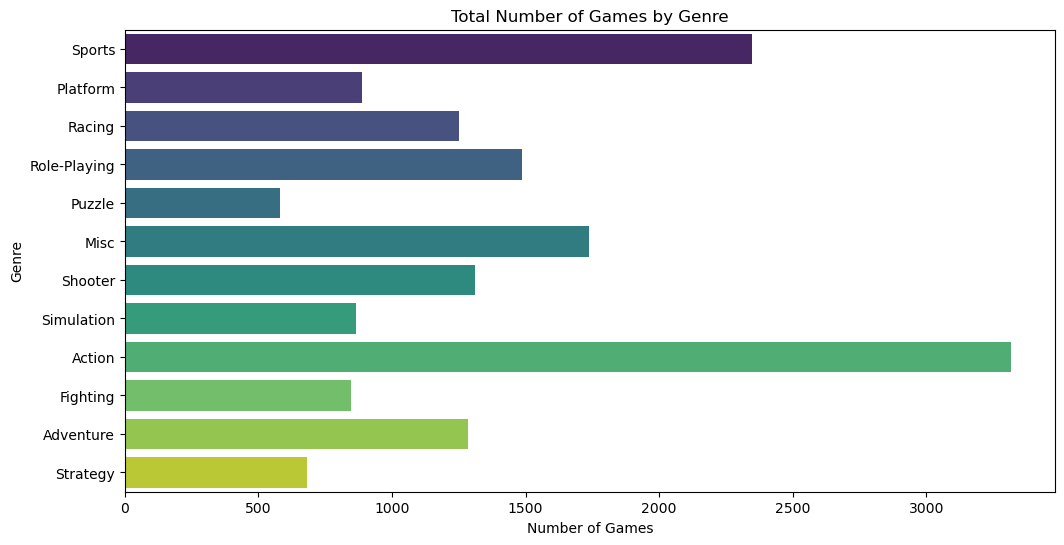

In [14]:
# Total number of games by genre
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="Genre", data=df, palette="viridis")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.title('Total Number of Games by Genre')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()
# First place is Action
# Second place is Sports
# Third place is Misc(Other genres)

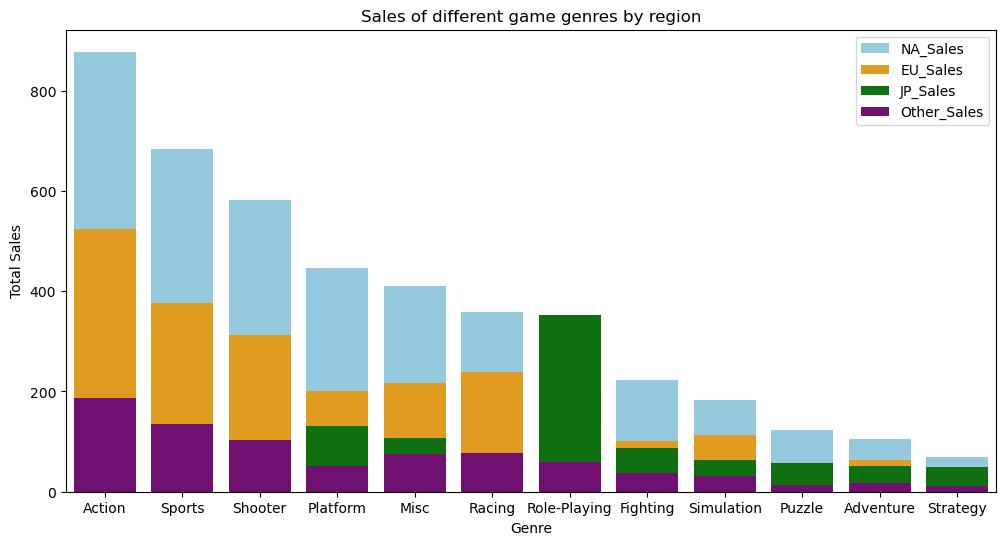

In [15]:
# Sales of different game genres by region,
platform_genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
platform_genre_sales = platform_genre_sales.sort_values(by='NA_Sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='NA_Sales', data=platform_genre_sales, label='NA_Sales', color='skyblue')
sns.barplot(x='Genre', y='EU_Sales', data=platform_genre_sales, label='EU_Sales', color='orange')
sns.barplot(x='Genre', y='JP_Sales', data=platform_genre_sales, label='JP_Sales', color='green')
sns.barplot(x='Genre', y='Other_Sales', data=platform_genre_sales, label='Other_Sales', color='purple')

plt.title('Sales of different game genres by region')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Action game genre is the best selling genre in North America.
# Action game genre is the best selling genre in Europe.
# Role-playing game genre is the best selling genre in Japan.

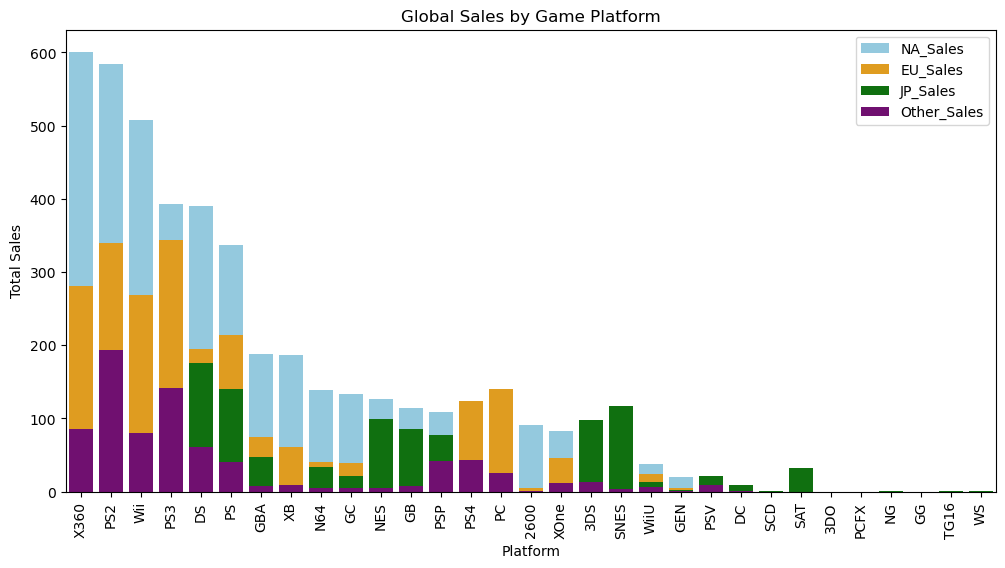

In [16]:
# Global sales by gaming platform
platform_genre_sales = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
platform_genre_sales = platform_genre_sales.sort_values(by='NA_Sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='NA_Sales', data=platform_genre_sales, label='NA_Sales', color='skyblue')
sns.barplot(x='Platform', y='EU_Sales', data=platform_genre_sales, label='EU_Sales', color='orange')
sns.barplot(x='Platform', y='JP_Sales', data=platform_genre_sales, label='JP_Sales', color='green')
sns.barplot(x='Platform', y='Other_Sales', data=platform_genre_sales, label='Other_Sales', color='purple')
plt.title('Global Sales by Game Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.legend()
plt.show()
# X360 platform is the best selling gaming platform in North America.
# PS3 platformis the best selling gaming platform in Europe.
# DS platform is the best selling gaming platform in Japan.

<Figure size 1200x600 with 0 Axes>

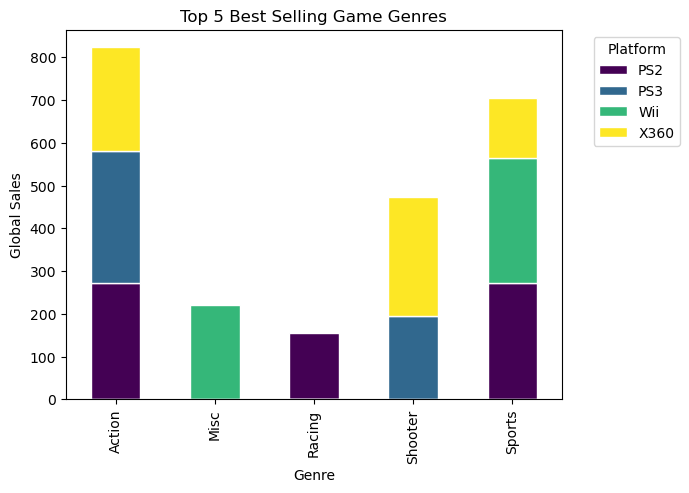

In [17]:
# Top 5 Best Selling Game Genres on most popular platforms
platform_genre_sales = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()
max_sales_genre = platform_genre_sales.nlargest(10, 'Global_Sales')

# Pivot the data for a stacked bar plot
max_sales_genre_pivot = max_sales_genre.pivot(index='Genre', columns='Platform', values='Global_Sales').fillna(0)

# Creating a stacked bar chart using Seaborn
plt.figure(figsize=(12, 6))
max_sales_genre_pivot.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='w')

plt.title('Top 5 Best Selling Game Genres')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# The best-selling game genres on the PS3 platform are: action and shooter
# The best-selling game genres on the Wii platform are: sports and misc
# The best-selling game genres on the X360 platform are: shooter and action
# The best-selling game genres on the PS2 platform are: action, sports and racing
# The best-selling game genres on the DS platform is: misc(other genres)

<Figure size 1200x600 with 0 Axes>

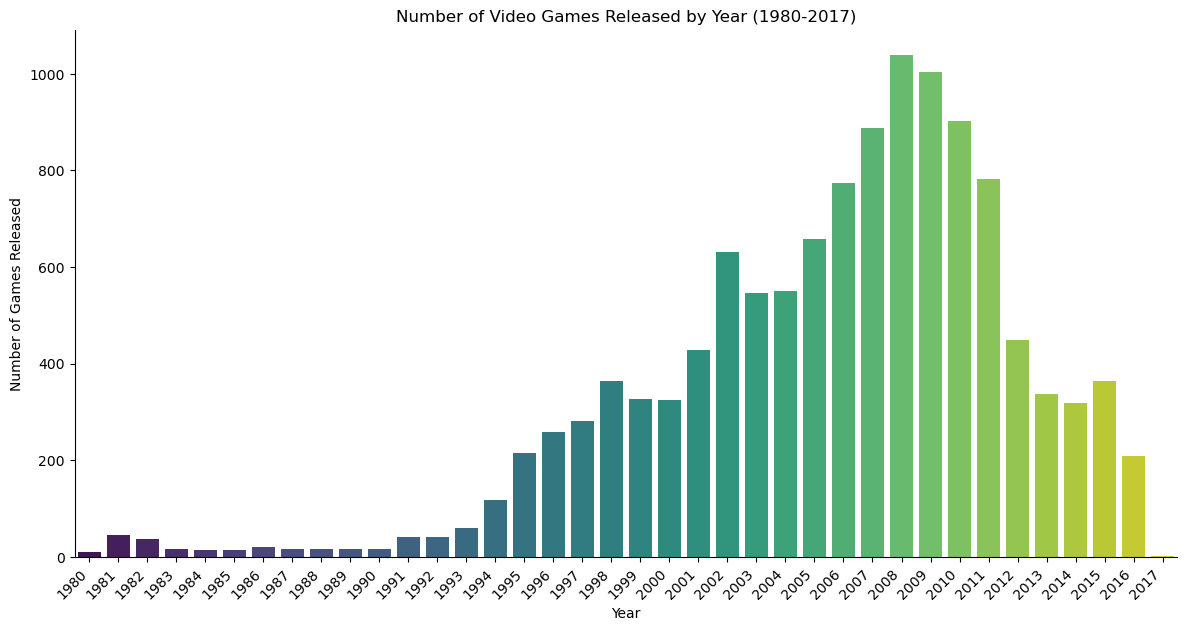

In [18]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
filtered_data = df[(df['Year'] != 0) & (df['Year'] >= 1980) & (df['Year'] <= 2017)]

unique_game_counts_by_year = filtered_data.groupby('Year')['Name'].nunique().reset_index()
unique_game_counts_by_year['Year'] = unique_game_counts_by_year['Year'].astype(int)

plt.figure(figsize=(12, 6))
sns.catplot(x='Year', y='Name', data=unique_game_counts_by_year, kind='bar', height=6, aspect=2, palette='viridis', ci=None)
plt.title('Number of Video Games Released by Year (1980-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45, ha='right')
plt.show()
# Record number of 1039 different games were released in 2008

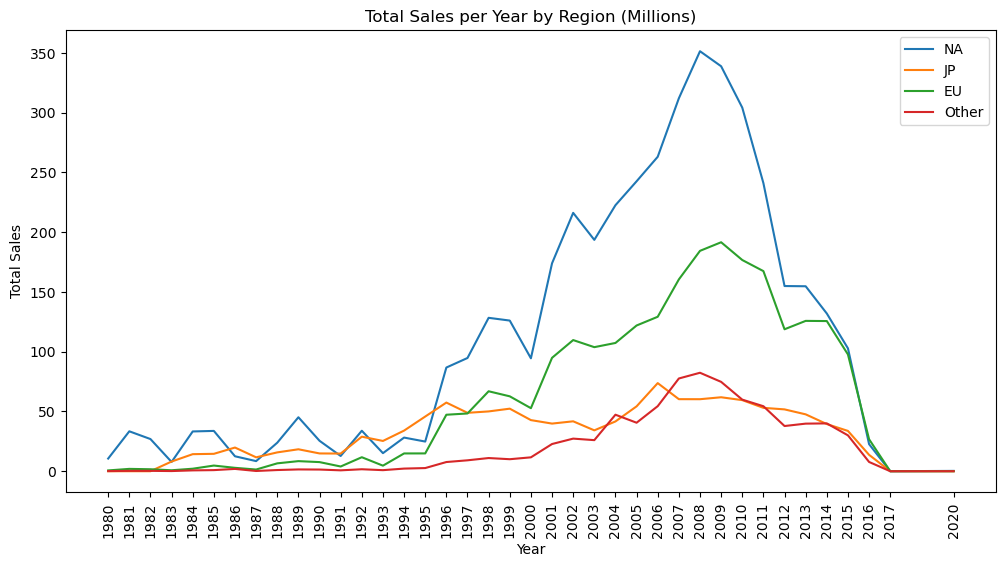

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

new_data = df.copy()
total_sales_column = "Total_Sales"

if 'Total_Shipped' in new_data.columns:
    new_data[total_sales_column] = new_data['Total_Shipped'].fillna(0) + new_data['Global_Sales'].fillna(0)
else:
    regions = ['NA', 'JP', 'EU', 'Other']
    region_sales_suffix = '_Sales'
    
    new_data[total_sales_column] = new_data['Global_Sales']

if 'Total_Shipped' in new_data.columns:
    regions = ['NA', 'JP', 'PAL', 'Other']
else:
    regions = ['NA', 'JP', 'EU', 'Other']

region_sales_suffix = '_Sales'
regions_agg = {}

for region in regions:
    regions_agg[region + region_sales_suffix] = 'sum'

regions_agg[total_sales_column] = 'sum'

new_data['Year'] = pd.to_numeric(new_data['Year'], errors='coerce')

geo_tdf = new_data.groupby(['Year']).agg(regions_agg).reset_index()
geo_tdf = geo_tdf.sort_values('Year', ascending=True)

geo_tdf = geo_tdf.loc[:, geo_tdf.sum(axis=0) > 0]

geo_tdf = geo_tdf[(geo_tdf['Year'] >= 1980) & (geo_tdf['Year'] <= 2020)]

plt.figure(figsize=(12, 6))
for region in regions:
    sns.lineplot(x='Year', y=region + region_sales_suffix, data=geo_tdf, label=region)

plt.title("Total Sales per Year by Region (Millions)")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(geo_tdf['Year'].astype(int), rotation=90)  # Show years as integers
plt.legend()
plt.show()
# The highest sales in 2006 were in Japan.
# The highest sales in 2008 were in North America.
# The highest sales in 2009 were in Europe.

# Machine Learning Models

<font size="3"><strong>Implementing Label Encoder</strong></font>

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
data = df.copy()
le = LabelEncoder()

In [22]:
feature = ["Platform", "Genre"]

for col in feature:
    data[col] = le.fit_transform(df[col])

<font size="3"><strong>Creating training and target features for train and test splits</strong></font>

In [24]:
X = data[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = data['Global_Sales'].values
X[:5], y[:5]

(array([[26.  , 10.  , 41.49, 29.02,  3.77,  8.46],
        [11.  ,  4.  , 29.08,  3.58,  6.81,  0.77],
        [26.  ,  6.  , 15.85, 12.88,  3.79,  3.31],
        [26.  , 10.  , 15.75, 11.01,  3.28,  2.96],
        [ 5.  ,  7.  , 11.27,  8.89, 10.22,  1.  ]]),
 array([82.74, 40.24, 35.82, 33.  , 31.37]))

<font size="3"><strong>Split the data into Train and Test sets</strong></font>

In [25]:
from sklearn.model_selection import train_test_split # importing data spliting sklearn function 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45) # 20% for test set, 80% training, seed for the random number generator, making sure that data is reproducible

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape # printing shapes of training and testing sets to ensure splitting was done correctly

((13278, 6), (13278,), (3320, 6), (3320,))

<font size="5"><strong>Selecting ML models</strong></font>

<font size="3"><strong>Linear Regression</strong></font>

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # r2 score for calculation

In [32]:
lr = LinearRegression()
lr. fit(X_train, y_train) # fit model with training data
pred = lr.predict(X_test) # making predictions on test set
r2_MultiLinear = r2_score(y_test,pred) # r2score calculates the R-squared value, which represents how well linear regression model predicts the variability in the variable(y_test)

In [33]:
print(r2_MultiLinear) # Numbers are the same so we can say that model is performing very good on test set, values close to 1 says that predictions are almost matching real values
print(lr.score(X_test, y_test)) 

0.9999928402231678
0.9999928402231678


<font size="3"><strong>KNNeighbors</strong></font>

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
kRange = range(1, 15, 1) # creating range of k values, numbers used to determine number of neighbors

scores_list = [] # to store the R-squared scores for each k value
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i) # for each k value new regressor is created
    regressor_knn.fit(X_train, y_train) # fit data
    pred = regressor_knn.predict(X_test) # predicting
    scores_list.append(r2_score(y_test,pred)) # calculating and storing r2 score

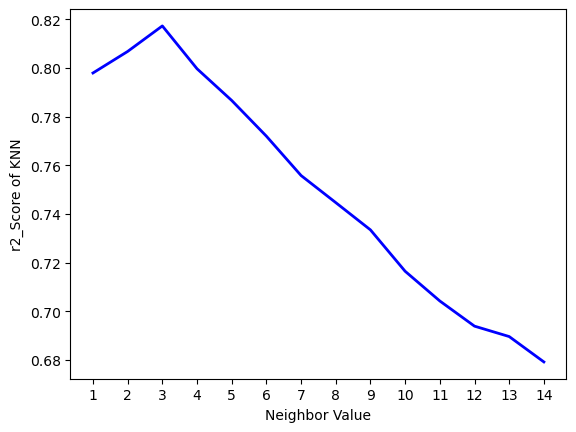

In [40]:
plt.plot(kRange, scores_list, linewidth=2, color='blue') # from the plot we can see that best value of neighbors is 3 and after that is only declining
plt.xticks(kRange)
plt.xlabel('Neighbor Value')
plt.ylabel('r2_Score of KNN')
plt.show()

In [42]:
regressor_knn = KNeighborsRegressor(n_neighbors = 3) # KNN on training set, result 81% percent variance in the target variable
regressor_knn.fit(X_train, y_train)
pred = regressor_knn.predict(X_test)
r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.8172284828082859


<font size="3"><strong>Decision Tree Regressor</strong></font>

In [43]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=32)

In [44]:
dtr.fit(X_train, y_train) # result is 82%
pred = dtr.predict(X_test)
print(r2_score(y_test,pred))

0.8253463322258714


<font size="3"><strong>Random Forest Tree Regressor</strong></font>

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=18)

In [46]:
rfr.fit(X_train, y_train) # result is 82%
pred = rfr.predict(X_test)
print(r2_score(y_test,pred))

0.8239754820175267


<font size="3"><strong>Support Vector Machine</strong></font>

In [49]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear')
svr_rbf = SVR(kernel='rbf')

In [51]:
svr_linear.fit(X_train, y_train) # Linear Kernel result is 99%
svr_rbf.fit(X_train, y_train) # Radial Basis Function is 48%

pred_linear = svr_linear.predict(X_test)
pred_rbf = svr_rbf.predict(X_test)

print(r2_score(y_test, pred_linear))
print(r2_score(y_test, pred_rbf))

0.9983709152995384
0.4836465140034073
